In [9]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from data.data_manager import *
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition


# read data
pittsburgh_X, pittsburgh_Y = data_tree['pittsburgh']['all_year']
ny_X, ny_Y = data_tree['new_york']['all_year']

In [10]:
'''
Compute the the information entropy of both distributions
'''

from scipy.stats import entropy

# Form 100 bins from 14 to 28 for both indoor and outdoor temperature, total 10000 bins
binx = np.linspace(14, 28, 101)
biny = np.linspace(-10, 30, 101)

# count the number of samples in each bin
pittsburgh_count, xedges, yedges = np.histogram2d(
    pittsburgh_X['Zone Air Temperature(SPACE1-1)'], 
    pittsburgh_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
    bins=[binx, biny])

ny_count, xedges, yedges = np.histogram2d(
    ny_X['Zone Air Temperature(SPACE1-1)'], 
    ny_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
    bins=[binx, biny])

# normalize the count to get the probability distribution
pittsburgh_prob = pittsburgh_count / np.sum(pittsburgh_count)
ny_prob = ny_count / np.sum(ny_count)

# print('Pittsburgh probability: ', pittsburgh_prob)
# print('New York probability: ', ny_prob)

# compute the entropy
pittsburgh_entropy = entropy(pittsburgh_prob.flatten())
ny_entropy = entropy(ny_prob.flatten())

print('Pittsburgh entropy: ', pittsburgh_entropy)
print('New York entropy: ', ny_entropy)

# print kl divergence between the two distributions
print('KL divergence: ', entropy(pittsburgh_prob.flatten(), ny_prob.flatten()))

from scipy.spatial import distance

pitts_JSD = distance.jensenshannon(pittsburgh_prob.flatten(), np.ones(10000) / 10000)
ny_JSD = distance.jensenshannon(ny_prob.flatten(), np.ones(10000) / 10000)
# compute Jensen-Shannon distance between two distributions and uniform distribution
print('Pittsburgh Jensen-Shannon distance: ', distance.jensenshannon(pittsburgh_prob.flatten(), np.ones(10000) / 10000))
print('New York Jensen-Shannon distance: ', distance.jensenshannon(ny_prob.flatten(), np.ones(10000) / 10000))

# comupte Jensen-Shannon distance between two distributions
JSD = distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten())
print('Jensen-Shannon distance: ', distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten()))
print('Jensen-Shannon distance squared: ', distance.jensenshannon(pittsburgh_prob.flatten(), ny_prob.flatten())**2)

Pittsburgh entropy:  7.98643571597185
New York entropy:  8.114200799573148
KL divergence:  inf
Pittsburgh Jensen-Shannon distance:  0.5386341820515361
New York Jensen-Shannon distance:  0.5197904177656204
Jensen-Shannon distance:  0.3392613194224725
Jensen-Shannon distance squared:  0.11509824285627693


/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_43729/1826491005.py:35: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_43729/1826491005.py:37: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_43729/1826491005.py:39: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_43729/1826491005.py:41: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


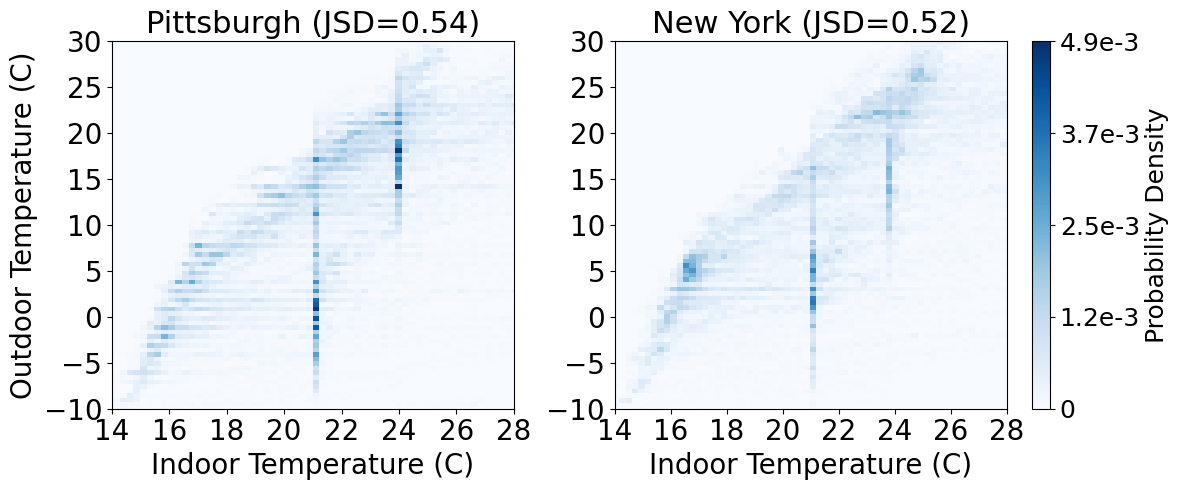

In [11]:
'''
Plot heatmaps of data distribution. 
    X = indoor temperature, Y = outdoor temperature
    Color = hist2d

    Plot pittsburgh and new york on same plot side
    Plot a single color bar representing the density scale
'''

fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1.22]})

plt.subplots_adjust(wspace=0.4)
ax[0].set_title('Pittsburgh (JSD={})'.format(round(pitts_JSD, 2)), fontsize=22)
ax[1].set_title('New York (JSD={})'.format(round(ny_JSD, 2)), fontsize=22)
ax[0].set_xlabel('Indoor Temperature (C)', fontsize=20)
ax[0].set_ylabel('Outdoor Temperature (C)', fontsize=20)
ax[1].set_xlabel('Indoor Temperature (C)', fontsize=20)
# ax[1].set_ylabel('Outdoor Temperature (C)', fontsize=18)
cmap = 'Blues'
ax[0].hist2d(pittsburgh_X['Zone Air Temperature(SPACE1-1)'], 
             pittsburgh_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
             cmap=cmap,
             bins=100, vmin=0, vmax=160)
ax[1].hist2d(ny_X['Zone Air Temperature(SPACE1-1)'], 
             ny_X['Site Outdoor Air Drybulb Temperature(Environment)'], 
             cmap=cmap,
             bins=100, vmin=0, vmax=160)
ax[0].set_xlim(14, 28)
ax[1].set_xlim(14, 28)
ax[0].set_ylim(-10, 30)
ax[1].set_ylim(-10, 30)

# set tick font size
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ticks = [0, 40, 80, 120, 160]/np.sum(pittsburgh_count)
# print(ticks)
cbar = fig.colorbar(ax[1].collections[0], ax=ax[1], ticks=[0, 40, 80, 120, 160])
cbar.ax.set_yticklabels(['0', '1.2e-3', '2.5e-3', '3.7e-3', '4.9e-3'])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('figures/distribution_heatmap.pdf', dpi=300)